An XYZ company (telecom company) wants to predict which customer is going to churn(switch to another operator)

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")


# 1. Data Importing

In [2]:
telcom = pd.read_csv (r"C:\Users\ganes\Downloads\churn.csv")

In [3]:
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Pre-Processing
-  Data Type and conversion
- Data Manipulation

In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#replace values
telcom.SeniorCitizen = telcom.SeniorCitizen.replace({1:"Yes",0:"No"})

In [6]:
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan).astype(float) # string cannot be convert float direclty 

In [7]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

# 2.2. Data Manipulation

In [8]:
telcom.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [9]:
telcom.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [10]:
telcom.OnlineSecurity=telcom.OnlineSecurity.replace({'No internet service' : 'No'})
telcom.OnlineBackup=telcom.OnlineBackup.replace({'No internet service' : 'No'})
telcom.DeviceProtection=telcom.DeviceProtection.replace({'No internet service' : 'No'})
telcom.TechSupport=telcom.TechSupport.replace({'No internet service' : 'No'})
telcom.StreamingTV=telcom.StreamingTV.replace({'No internet service' : 'No'})
telcom.StreamingMovies=telcom.StreamingMovies.replace({'No internet service' : 'No'})

In [11]:
telcom.OnlineBackup.value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [12]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [13]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),axis = 1)

# 3. Missing Value Identify & Treatment

In [14]:
# count the number of NaN values in each column
print(telcom.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group         0
dtype: int64


In [15]:
telcom.TotalCharges.fillna(telcom.TotalCharges.mean(),inplace=True) # one column at a time bb

In [16]:
# count the number of NaN values in each column
print(telcom.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64


# 4.Outlier identify & Treatment

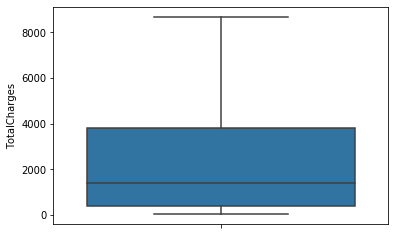

In [17]:
sns.boxplot(y=telcom.TotalCharges)  # Single Variable

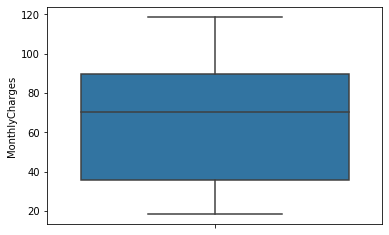

In [18]:
sns.boxplot(y=telcom.MonthlyCharges)  # Single Variable

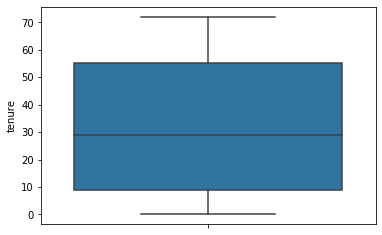

In [19]:
sns.boxplot(y=telcom.tenure)  # Single Variable

# 5.Labeling the data

In [20]:
telcom = telcom.drop('customerID',axis =1)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
telcom =telcom.apply(LabelEncoder().fit_transform)

# Data Partition

In [23]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = telcom.drop('Churn', axis = 1)
Y = telcom[['Churn']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestClassifier(n_estimators= 5) # means number of tree we want!
regressor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 # Step 6 : Predictions on Train Dataset

In [25]:
y_predict = regressor.predict(X_train)

In [26]:
train = pd.concat([X_train,y_train],axis = 1)

In [27]:
train['Predicted'] =y_predict

# Step 7 : Model Performance Metrics

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix =confusion_matrix(train['Churn'],train['Predicted'])
print(confusion_matrix)

[[3567   44]
 [  90 1229]]


In [29]:
Accuracy_Train=((3569+1206)/(3569+1206+42+113)*100)
print(Accuracy_Train)

96.85598377281947


# Step 8 : Predictions on Test Dataset

In [30]:
y_prediction = regressor.predict(X_test)

In [31]:
test = pd.concat([X_test,y_test],axis =1)

In [32]:
test['Predicted'] = y_prediction

# Step 9 : Model Performance Metrics on Test data

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Churn'], test['Predicted'])
print(confusion_matrix)

[[1321  242]
 [ 270  280]]


In [34]:
Accuracy_test=((1351+265)/(1351+265+212+285)*100)
Accuracy_test

76.47893989588263

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test['Predicted']))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1563
           1       0.54      0.51      0.52       550

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.76      0.76      2113

